In [1]:
import pandas as pd

In [2]:
# df=pd.read_csv('https://raw.githubusercontent.com/tonyfischetti/InteractiveLogisticRegression/master/circles.csv')
df = pd.read_csv('https://raw.githubusercontent.com/tonyfischetti/InteractiveLogisticRegression/master/moons.csv')

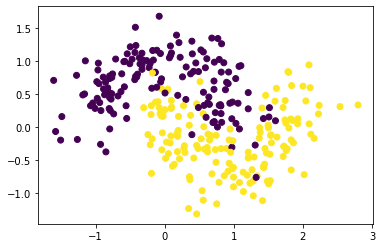

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['X1'],df['X2'],c=df['Y'])

In [4]:
sample=df.sample(30)
X=sample[['X1','X2']]
y=sample['Y']

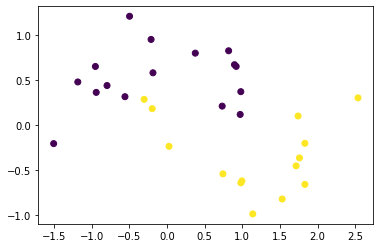

In [5]:
plt.scatter(X['X1'],X['X2'],c=y)

## 로지스틱회귀

In [6]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [7]:
reg.fit(X,y)

LogisticRegression()

In [8]:
x1_min = df['X1'].min()
x1_max = df['X1'].max()
x2_min = df['X2'].min()
x2_max = df['X2'].max()

In [9]:
import numpy as np
x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
X_bound=np.column_stack((x1_grid.ravel(),x2_grid.ravel()))
y_bound=reg.predict(X_bound)
y_bound=y_bound.reshape(x1_grid.shape)

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


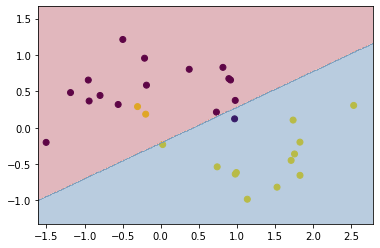

In [10]:
plt.scatter(X['X1'],X['X2'],c=y)
cs = plt.contourf(x1_grid, x2_grid, y_bound, cmap='RdBu',alpha=0.3)

## 2차항 및 인터렉션 포함

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
X_temp=poly.fit_transform(X)
reg.fit(X_temp,y)

LogisticRegression()

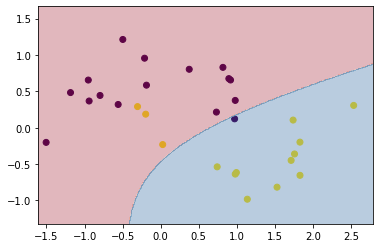

In [12]:
x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
X_bound=np.column_stack((x1_grid.ravel(),x2_grid.ravel()))
poly=PolynomialFeatures(degree=2,include_bias=False)
y_bound=reg.predict(poly.fit_transform(X_bound))
y_bound=y_bound.reshape(x1_grid.shape)
plt.scatter(X['X1'],X['X2'],c=y)
plt.contourf(x1_grid, x2_grid, y_bound, cmap='RdBu',alpha=0.3)

## 3차항 및 인터렉션 포함

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=False)
X_temp=poly.fit_transform(X)
reg.fit(X_temp,y)

LogisticRegression()

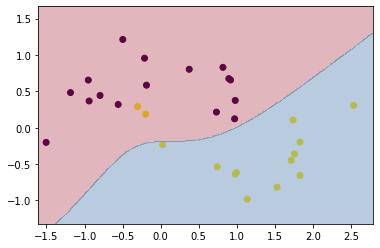

In [16]:
x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
X_bound=np.column_stack((x1_grid.ravel(),x2_grid.ravel()))
y_bound=reg.predict(poly.fit_transform(X_bound))
y_bound=y_bound.reshape(x1_grid.shape)
plt.scatter(X['X1'],X['X2'],c=y)
plt.contourf(x1_grid, x2_grid, y_bound, cmap='RdBu',alpha=0.3)

## 5차항 및 인터렉션 포함

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5,include_bias=False)
X_temp=poly.fit_transform(X)
reg.fit(X_temp,y)

LogisticRegression()

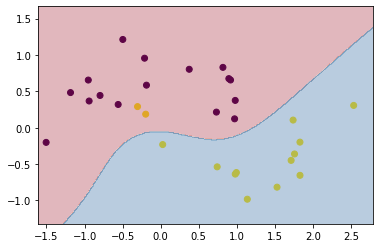

In [18]:
x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
X_bound=np.column_stack((x1_grid.ravel(),x2_grid.ravel()))
y_bound=reg.predict(poly.fit_transform(X_bound))
y_bound=y_bound.reshape(x1_grid.shape)
plt.scatter(X['X1'],X['X2'],c=y)
plt.contourf(x1_grid, x2_grid, y_bound, cmap='RdBu',alpha=0.3)

## 8차항 및 인터렉션 포함

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=8,include_bias=False)
X_temp=poly.fit_transform(X)
reg.fit(X_temp,y)

LogisticRegression()

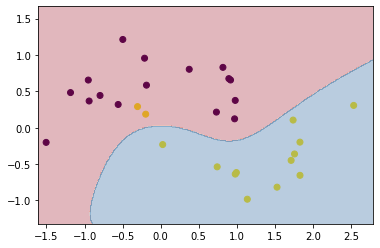

In [20]:
x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
X_bound=np.column_stack((x1_grid.ravel(),x2_grid.ravel()))
y_bound=reg.predict(poly.fit_transform(X_bound))
y_bound=y_bound.reshape(x1_grid.shape)
plt.scatter(X['X1'],X['X2'],c=y)
plt.contourf(x1_grid, x2_grid, y_bound, cmap='RdBu',alpha=0.3)

## 유연성 높은 모델이 반드시 좋은가?

In [77]:
from sklearn.metrics import accuracy_score

real_X = df[['X1','X2']]
real_y = df['Y']
true_acc = []
train_acc = []
for i in range(1,15):
    
    sample=df.sample(30)
    X=sample[['X1','X2']]
    y=sample['Y']    
    
    poly = PolynomialFeatures(degree=i,include_bias=False)    
    X_temp = poly.fit_transform(X)
    reg.fit(X_temp,y)
    
    y_pred=reg.predict(X_temp)
    train_acc.append(accuracy_score(y,y_pred))
    
    real_X_transformed =  poly.fit_transform(real_X)
    true_acc.append(accuracy_score(real_y,reg.predict(real_X_transformed)))

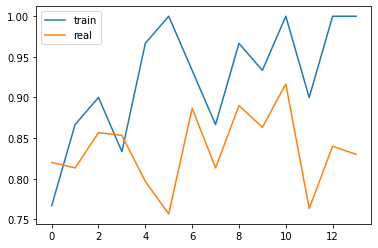

In [78]:
plt.plot(train_acc,label='train')
plt.plot(true_acc,label='real')
plt.legend()